In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rc('axes', axisbelow=True)
from matplotlib.colors import to_rgb

from utils.visualization import plot_median_errorbars

In [39]:
## panel 1 (LARGE LANGUAGE MODELS)

## BERT models (bias: y, weight tying: y)
with open('../_data/fig-symmetry-language-models/full-models/BERT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
BERT_par = [4.4e6, 11.3e6, 29.1e6, 41.7e6, 110e6, 340e6, 66e6]
BERT_dataset = [3.3e9, 3.3e9, 3.3e9, 3.3e9, 3.3e9, 3.3e9, 3.3e9]
BERT_score = [models[key][-1].flatten() for key in list(models.keys())]
BERT_names = list(models.keys())

## ALBERT models (bias: y, weight tying: y)
with open('../_data/fig-symmetry-language-models/full-models/ALBERT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
ALBERT_par = [11e6, 17e6, 58e6, 223e6]
ALBERT_dataset = [3.3e9, 3.3e9, 3.3e9, 3.3e9]
ALBERT_score = [models[key][-1].flatten() for key in list(models.keys())]
ALBERT_names = list(models.keys())

## ROBERTA models (bias: y, weight tying: y)
with open('../_data/fig-symmetry-language-models/full-models/ROBERTA-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
ROBERTA_par = [125e6, 355e6, 82.2e6]
ROBERTA_dataset = [130e9, 130e9, 130e9]
ROBERTA_score = [models[key][-1].flatten() for key in list(models.keys())]
ROBERTA_names = list(models.keys())

with open('../_data/fig_scores/T5Encoder-query-key-full.pkl', 'rb') as file:
    models = pickle.load(file)    
T5Encoder_par = [60.5e6, 223e6, 738e6, 2850e6]
T5Encoder_score = [models[key][-1].flatten() for key in list(models.keys())]
T5Encoder_names = list(models.keys())

'------------------------------------------'

## GPT models (bias: y, weight tying: y)
with open('../_data/fig-symmetry-language-models/full-models/GPT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
GPT_par = [124e6, 124e6, 355e6, 774e6, 1500e6, 82e6]
GPT_dataset = [4.5e6, 40e6, 40e6, 40e6, 40e6, 40e6]
GPT_score = [models[key][-1].flatten() for key in list(models.keys())]
GPT_names = list(models.keys())
## CHECK THIS

## GPT-neo models (bias: y, weight tying: y)
with open('../_data/fig-symmetry-language-models/full-models/GPT-neo-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
GPTneo_par = [125e6, 1300e6, 2700e6, 6700e6]
GPTneo_dataset = [300e9, 380e9, 420e9, 800e9]
GPTneo_score = [models[key][-1].flatten() for key in list(models.keys())]
GPTneo_names = list(models.keys())

with open('../_data/fig_scores/OPT-query-key-full.pkl', 'rb') as file:
    models = pickle.load(file)    
OPT_par = [125e6, 350e6, 1300e6, 2700e6, 67008e6, 13000e6]
OPT_dataset = [800e9, 800e9, 800e9, 800e9, 800e9, 800e9]
OPT_score = [models[key][-1].flatten() for key in list(models.keys())]
OPT_names = list(models.keys())

with open('../_data/fig-symmetry-language-models/full-models/TinyGPT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
TinyGPT_par = [1e6, 3e6, 8e6, 21e6, 28e6]
TinyGPT_dataset = [1e6, 1e6, 1e6, 1e6, 1e6]
TinyGPT_score = [models[key][-1].flatten() for key in list(models.keys())]
TinyGPT_names = list(models.keys())

with open('../_data/fig-symmetry-language-models/full-models/LLAMA2-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
LLAMA2_par = [7000e6]
LLAMA2_dataset = [2e12]
LLAMA2_score = [models[key][-1].flatten() for key in list(models.keys())]
LLAMA2_names = list(models.keys())

## GEMMA models (bias: n, weight tying: y)
with open('../_data/fig_scores/GEMMA-query-key-full.pkl', 'rb') as file:
    models = pickle.load(file)    
GEMMA_par = [2000e6, 7000e6]
GEMMA_score = [models[key][-1].flatten() for key in list(models.keys())]
GEMMA_names = list(models.keys())

## GEMMA models (bias: n, weight tying: y)
with open('../_data/fig_scores/GEMMA1-query-key-full.pkl', 'rb') as file:
    models = pickle.load(file)    
GEMMA1_par = [2000e6, 7000e6]
GEMMA1_score = [models[key][-1].flatten() for key in list(models.keys())]
GEMMA1_names = list(models.keys())

with open('../_data/fig_scores/T5Encoder-query-key-full.pkl', 'rb') as file:
    models = pickle.load(file)    
T5Decoder_par = [60.5e6, 223e6, 738e6, 2850e6]
T5Decoder_score = [models[key][-1].flatten() for key in list(models.keys())]
T5Decoder_names = list(models.keys())

In [29]:
## create color palette for encoder and decoder models

def get_colors(color, n, max_blend = .8):

    base_color = to_rgb(color)
    tones = np.array([(1 - (i / (n - 1)) * max_blend) * np.array(base_color) + ((i / (n - 1)) * max_blend) * np.array([1, 1, 1]) for i in range(n)])
    
    return tones

c_encoder = get_colors('navy', n = 8)
c_decoder = get_colors('purple', n = 10)

/Users/matteosaponati/Desktop/repos/attention-geometry/utils/visualization.py:74: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(parameters[k], median, yerr = [[q1_range], [q2_range]],


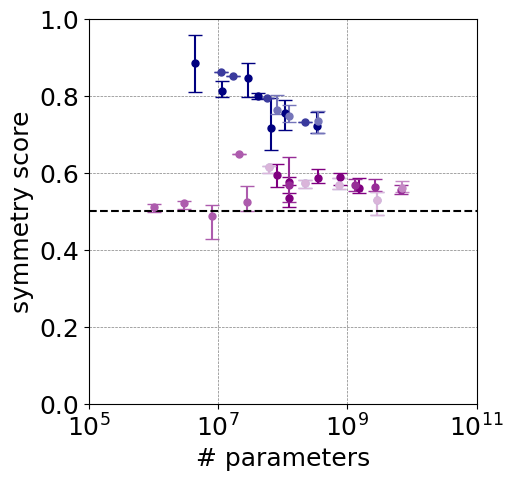

In [40]:
plt.figure(figsize=(5,5))

plot_median_errorbars(BERT_par, BERT_score, color = c_encoder[0])
plot_median_errorbars(ALBERT_par, ALBERT_score, color = c_encoder[2])
plot_median_errorbars(ROBERTA_par, ROBERTA_score, color = c_encoder[4])
plot_median_errorbars(T5Encoder_par, T5Encoder_score, color = c_encoder[6])

plot_median_errorbars(GPT_par, GPT_score, color = c_decoder[0])
plot_median_errorbars(GPTneo_par, GPTneo_score, color = c_decoder[2])
# plot_median_errorbars(OPT_par, OPT_score, color = c_decoder[2])
plot_median_errorbars(TinyGPT_par, TinyGPT_score, color = c_decoder[4])
plot_median_errorbars(LLAMA2_par, LLAMA2_score , color = c_decoder[6])
plot_median_errorbars(T5Decoder_par, T5Decoder_score, color = c_decoder[8])

plt.axhline(y=.5,linestyle='dashed',color='k')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xscale('log')
plt.ylim(0,1)
plt.ylabel('symmetry score')
plt.xlabel('# parameters')
plt.xlim(1e5,10e10)

plt.savefig('../figures/fig1-language-models.pdf', format='pdf', dpi=300)

/Users/matteosaponati/Desktop/repos/attention-geometry/utils/visualization.py:74: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(parameters[k], median, yerr = [[q1_range], [q2_range]],


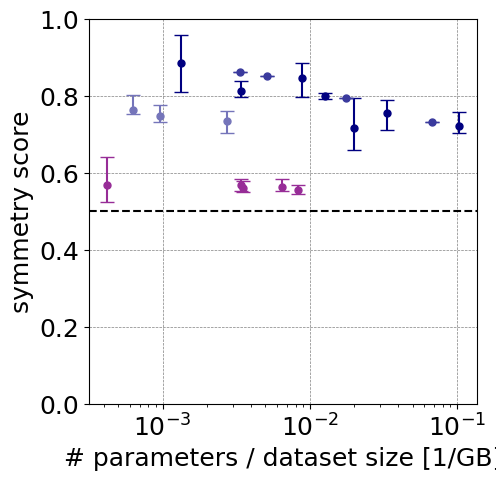

In [38]:
plt.figure(figsize=(5,5))

plot_median_errorbars(np.array(BERT_par) / np.array(BERT_dataset), BERT_score, color = c_encoder[0])
plot_median_errorbars(np.array(ALBERT_par) / np.array(ALBERT_dataset), ALBERT_score, color = c_encoder[2])
plot_median_errorbars(np.array(ROBERTA_par) / np.array(ROBERTA_dataset), ROBERTA_score, color = c_encoder[4])

# plot_median_errorbars(np.array(GPT_par) / np.array(GPT_dataset), GPT_score, color = c_decoder[0])
# plot_median_errorbars(np.array(TinyGPT_par) / np.array(TinyGPT_dataset), TinyGPT_score, color = c_decoder[4])
plot_median_errorbars(np.array(GPTneo_par) / np.array(GPTneo_dataset), GPTneo_score, color = c_decoder[2])
plot_median_errorbars(np.array(LLAMA2_par) / np.array(LLAMA2_dataset), LLAMA2_score, color = c_decoder[2])

plt.axhline(y=.5,linestyle='dashed',color='k')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xscale('log')
plt.ylim(0,1)
plt.ylabel('symmetry score')
plt.xlabel('# parameters / dataset size [1/GB]')

plt.savefig('../figures/fig1-language-models.pdf', format='pdf', dpi=300)

In [6]:
## panel 2 (VISION MODELS)

## load encoder-only models

with open('../_data/fig-symmetry-vision-models/full-models/BEiT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
BEiT_par = [86e6, 86e6, 86e6, 307e6, 86e6, 307e6]
BEiT_score = [models[key][-1].flatten() for key in list(models.keys())]
BEiT_names = list(models.keys())

with open('../_data/fig-symmetry-vision-models/full-models/DeiT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
DeiT_par = [5e6, 22e6, 86e6]
DeiT_score = [models[key][-1].flatten() for key in list(models.keys())]
DeiT_names = list(models.keys())

with open('../_data/fig-symmetry-vision-models/full-models/DINO-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
DINO_par = [5e6, 86e6, 5e6, 86e6]
DINO_score = [models[key][-1].flatten() for key in list(models.keys())]
DINO_names = list(models.keys())

with open('../_data/fig-symmetry-vision-models/full-models/ViT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
ViT_par = [86e6, 86e6, 86e6, 307e6, 307e6, 307e6]
ViT_score = [models[key][-1].flatten() for key in list(models.keys())]
ViT_names = list(models.keys())

## GPT-neo models (bias: y, weight tying: n)
with open('../_data/fig-symmetry-vision-models/full-models/iGPT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)    
iGPT_par = [76e6, 455e6, 1360e6]
iGPT_score = [models[key][-1].flatten() for key in list(models.keys())]
iGPT_names = list(models.keys())

/Users/matteosaponati/Desktop/repos/attention-geometry/utils/visualization.py:74: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(parameters[k], median, yerr = [[q1_range], [q2_range]],


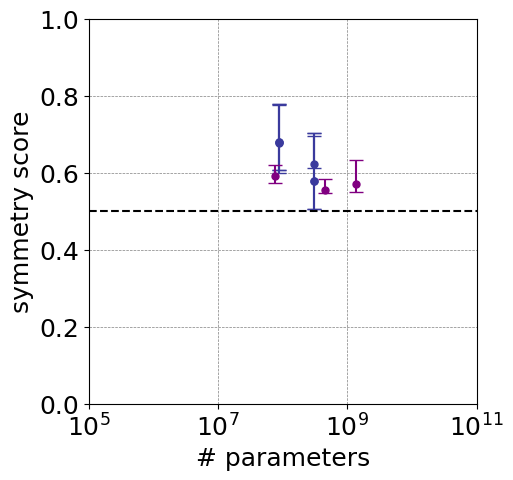

In [7]:
plt.figure(figsize=(5,5))

# plot_median_errorbars(BEiT_par, BEiT_score, color = c_encoder[0])
# plot_median_errorbars(DeiT_par, DeiT_score, color = c_encoder[2])
plot_median_errorbars(ViT_par, ViT_score, color = c_encoder[2])
# plot_median_errorbars(DINO_par, DINO_score, color = c_encoder[4])

plot_median_errorbars(iGPT_par, iGPT_score, color = c_decoder[0])

plt.axhline(y=.5,linestyle='dashed',color='k')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xscale('log')
plt.ylim(0,1)
plt.ylabel('symmetry score')
plt.xlabel('# parameters')
plt.xlim(1e5,10e10)

plt.savefig('fig1-vision-models.pdf', format='pdf', dpi=300)